In [11]:
from qiskit import *
from qiskit.visualization import plot_histogram

In [12]:
def simon_oracle(b):
    n = len(b)
    circ = QuantumCircuit(2*n, n)

    for i in range(n):
        circ.cx(i, i+n)

    for i in range(n):
        if b[n-1-i] == '1':
            for j in range(n):
                if b[j] == '1':
                    circ.cx(i, j + n)
            break

    return circ

In [18]:
b = '1001'
n = len(b)

circ = QuantumCircuit(2*n, n)
circ.h(range(n))
circ.barrier()

circ = circ.compose(simon_oracle(b))

circ.barrier()

circ.h(range(n))

circ.measure(range(n), range(n))

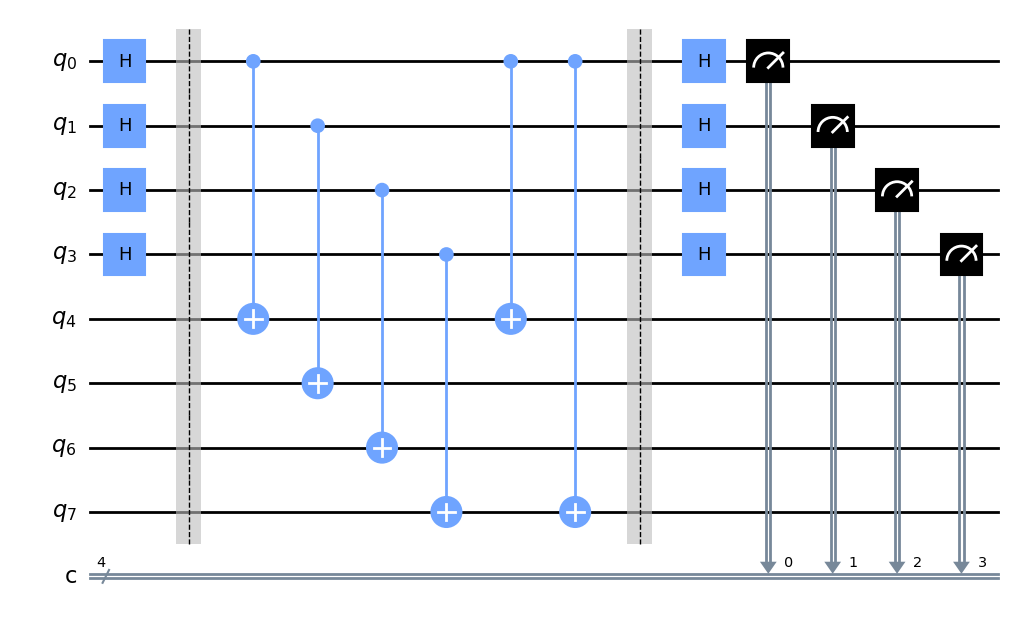

In [19]:
circ.draw('mpl')

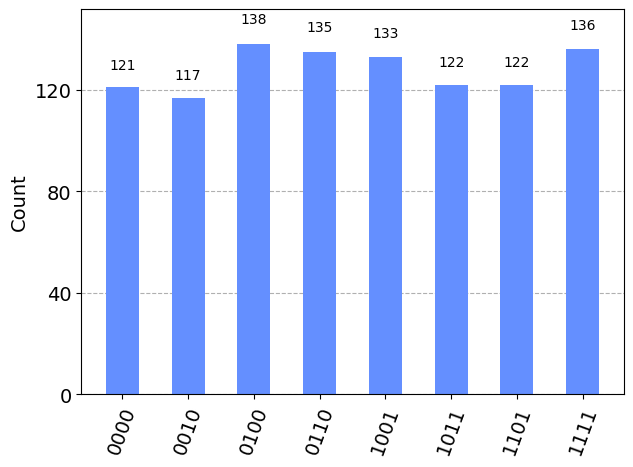

In [20]:
sim = Aer.get_backend("qasm_simulator")
result = execute(circ, backend=sim).result()

plot_histogram(result.get_counts())

In [16]:
#find b

def bdotz(b, z):
    accum = 0
    for i in range(len(b)):
        accum += int(b[i]) * int(z[i])
    print(accum)
    return (accum % 2)

In [21]:
shots = 1024
for z in result.get_counts().keys():
    print( '{} . {} = {} (mod 2) ({:.1f}%)'.format(b, z, bdotz(b,z), result.get_counts()[z]*100/shots))

0
1001 . 0000 = 0 (mod 2) (11.8%)
0
1001 . 0100 = 0 (mod 2) (13.5%)
2
1001 . 1101 = 0 (mod 2) (11.9%)
0
1001 . 0110 = 0 (mod 2) (13.2%)
2
1001 . 1111 = 0 (mod 2) (13.3%)
0
1001 . 0010 = 0 (mod 2) (11.4%)
2
1001 . 1011 = 0 (mod 2) (11.9%)
2
1001 . 1001 = 0 (mod 2) (13.0%)
